- Bibliotecas

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

- Dados

In [36]:
df = pd.read_csv('data\proposicoes_ord_2013-2023.csv')
df

,nomeProposicao,idProposicao,partidoAutor,DataApresentacao,Ano,Administração e Políticas Públicas,Desenvolvimento Social e Urbano,Direitos e Justiça,Economia e Desenvolvimento Sustentável,Infraestrutura e Gestão de Recursos,Influencia,Aliado,Oposição,PPC_igual_partidoAutor,VirouLei,Partido_Pres_Cam
0,PL 4926/2013,564574,PR,2013-02-04,2013,0,1,0,0,0,0.077973,1,0,0,0,PMDB
1,PL 4931/2013,564595,PR,2013-02-04,2013,1,1,0,0,1,0.024691,1,0,0,0,PMDB
2,PL 4928/2013,564579,PSB,2013-02-04,2013,0,1,0,0,0,0.025341,1,0,0,0,PMDB
3,PL 4936/2013,564610,PR,2013-02-05,2013,0,0,0,1,0,0.148148,1,0,0,0,PMDB
4,PL 4937/2013,564611,PSD,2013-02-05,2013,0,0,0,1,0,0.033138,1,0,0,0,PMDB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7936,PL 5610/2023,2409046,PL,2023-12-04,2023,1,1,0,1,0,0.080078,0,1,0,1,PP
7937,PL 5867/2023,2409610,PSB,2023-12-05,2023,0,1,0,0,0,0.029297,1,0,0,1,PP
7938,PL 4266/2023,2410466,PSD,2023-12-06,2023,0,0,1,0,0,0.132812,1,0,0,1,PP
7939,PL 6009/2023,2413196,PT,2023-12-13,2023,1,0,0,0,0,0.007812,1,0,0,0,PP


- Features e Rótulo

In [37]:
colunas = df.columns.tolist()

In [38]:
x = df[colunas[5:-2]]
y = df[colunas[-2]]

x

,Administração e Políticas Públicas,Desenvolvimento Social e Urbano,Direitos e Justiça,Economia e Desenvolvimento Sustentável,Infraestrutura e Gestão de Recursos,Influencia,Aliado,Oposição,PPC_igual_partidoAutor
0,0,1,0,0,0,0.077973,1,0,0
1,1,1,0,0,1,0.024691,1,0,0
2,0,1,0,0,0,0.025341,1,0,0
3,0,0,0,1,0,0.148148,1,0,0
4,0,0,0,1,0,0.033138,1,0,0
...,...,...,...,...,...,...,...,...,...
7936,1,1,0,1,0,0.080078,0,1,0
7937,0,1,0,0,0,0.029297,1,0,0
7938,0,0,1,0,0,0.132812,1,0,0
7939,1,0,0,0,0,0.007812,1,0,0


- Undersampling + Treino e Teste

In [39]:
undersample = RandomUnderSampler(sampling_strategy=1.0)
x_sample, y_sample = undersample.fit_resample(x, y)

In [40]:
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(x_sample, y_sample, test_size=0.3, random_state=42)

- Construir uma árvore de decisão com a instância de treino

In [41]:
clf_s = DecisionTreeClassifier()
clf_s.fit(x_train_s, y_train_s)

acuracia_treino = clf_s.score(x_train_s, y_train_s)
acuracia_teste = clf_s.score(x_test_s, y_test_s)

print(f"Acurácia no treino: {acuracia_treino * 100:.2f}%")
print(f"Acurácia no teste: {acuracia_teste * 100:.2f}%")

Acurácia no treino: 88.10%
Acurácia no teste: 53.19%


- Plotar a árvore e computar $E_{in}$	e $E_{out}$ para analisar a existência de overfitting

In [42]:
ein = (1 - accuracy_score(y_train_s, clf_s.predict(x_train_s)))
eout = (1 - accuracy_score(y_test_s, clf_s.predict(x_test_s)))

print('Ein: %0.4f' % ein)
print('Eout: %0.4f' % eout)


if (eout - ein) > .1:
    print("Há tendência para overfitting")
else:
    print("Não há tendência para overfitting")

print('')
print(classification_report(y_test_s, clf_s.predict(x_test_s)))

print('')

tree_depth = clf_s.tree_.max_depth
print(f"Profundidade da árvore: {tree_depth}")

Ein: 0.1190
Eout: 0.4681
Há tendência para overfitting

              precision    recall  f1-score   support

           0       0.51      0.56      0.53       216
           1       0.56      0.50      0.53       239

    accuracy                           0.53       455
   macro avg       0.53      0.53      0.53       455
weighted avg       0.53      0.53      0.53       455


Profundidade da árvore: 21


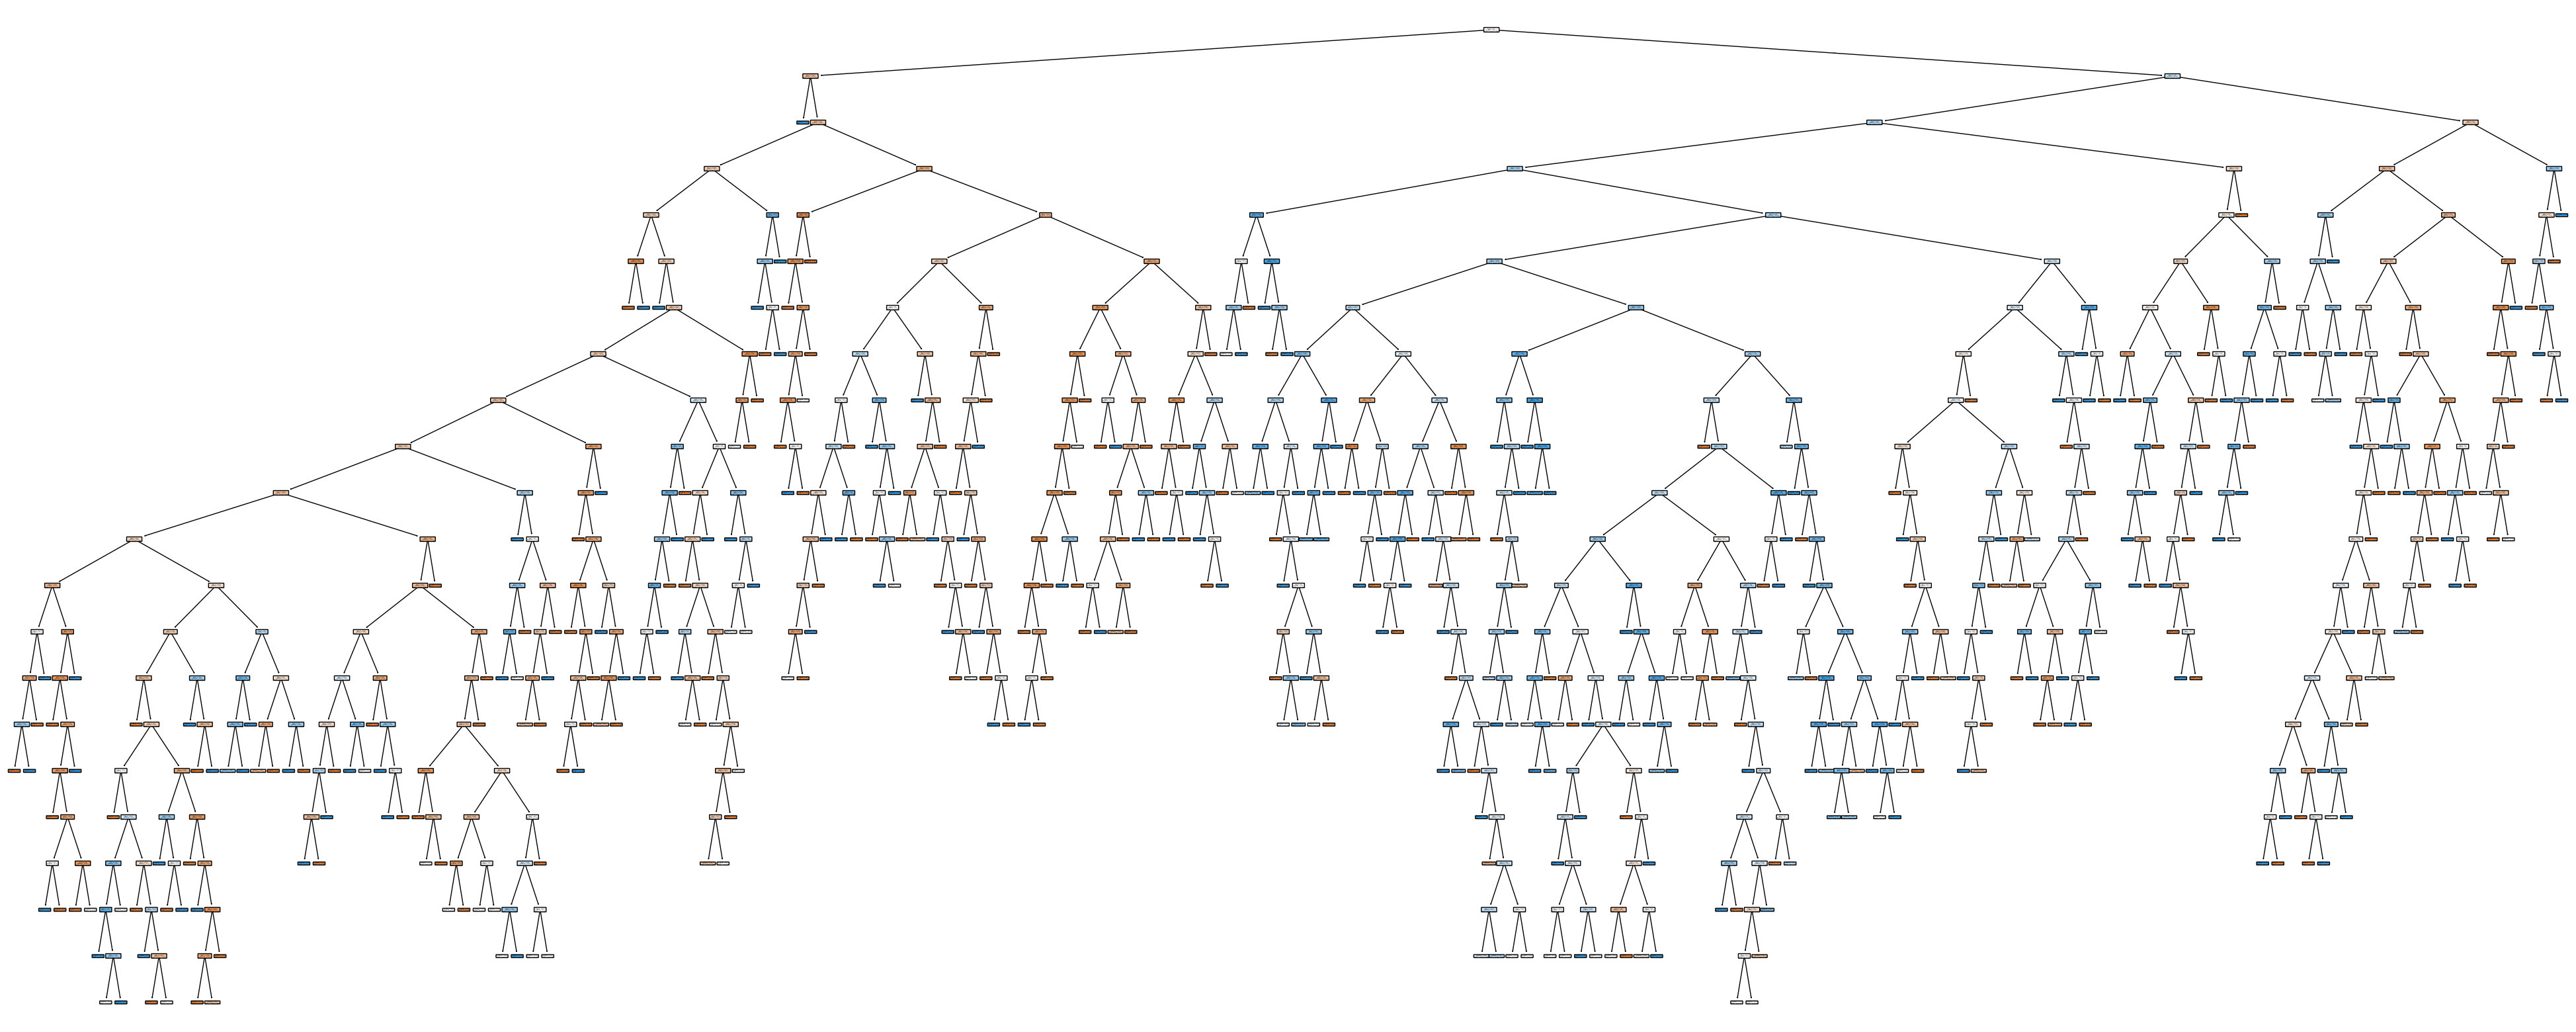

In [43]:
plt.figure(figsize=(50,20))
plot_tree(
    clf_s,
    filled=True, 
    proportion = True,
    rounded = True)
plt.show()

- Minimal Cost-Complexity + Cross Validation

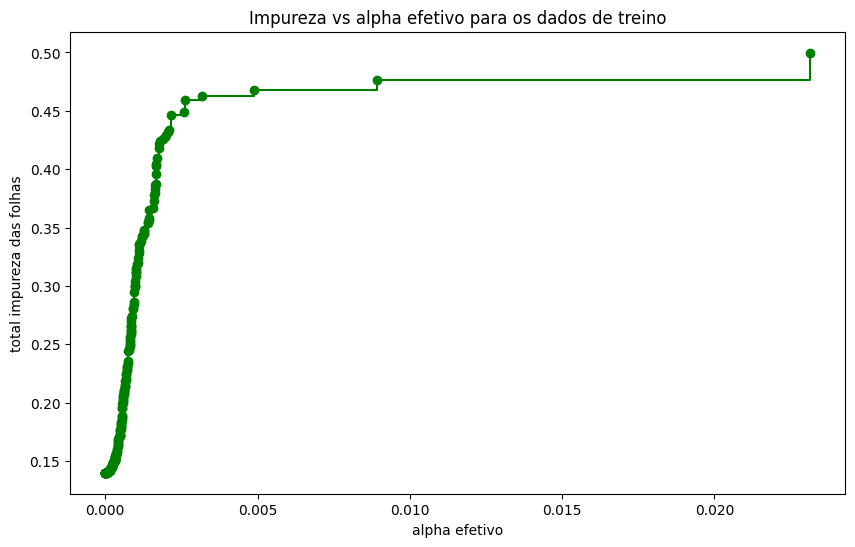

In [44]:
path = clf_s.cost_complexity_pruning_path(x_train_s, y_train_s)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities, marker='o', drawstyle="steps-post", color='green')
plt.xlabel("alpha efetivo")
plt.ylabel("total impureza das folhas")
plt.title("Impureza vs alpha efetivo para os dados de treino")
plt.show()

In [45]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clfs.append(clf)

alpha_results = []
for clf in clfs:
    scores = cross_val_score(clf, x_train_s, y_train_s, cv=10)
    alpha_results.append(scores.mean())

best_alpha = ccp_alphas[alpha_results.index(max(alpha_results))]
print(f"Melhor valor de alpha: {best_alpha}")

Melhor valor de alpha: 0.0031798008494449137


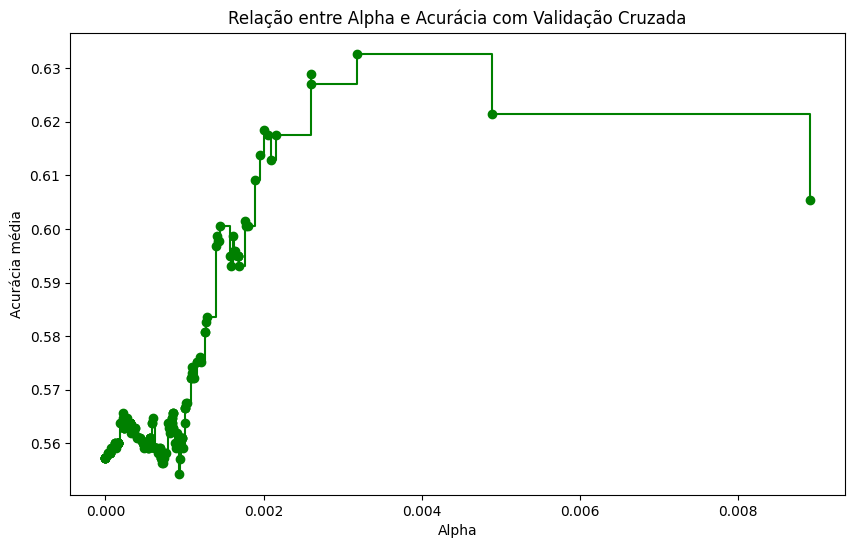

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas[:-1], alpha_results[:-1], marker='o', drawstyle="steps-post", color='green')
plt.xlabel('Alpha')
plt.ylabel('Acurácia média')
plt.title('Relação entre Alpha e Acurácia com Validação Cruzada')
plt.show()

In [47]:
clf_podada = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
clf_podada.fit(x_train_s, y_train_s)

train_acc_podada = clf_podada.score(x_train_s, y_train_s)
test_acc_podada = clf_podada.score(x_test_s, y_test_s)

print(f"Acurácia no treino após poda: {train_acc_podada * 100:.2f}%")
print(f"Acurácia no teste após poda: {test_acc_podada * 100:.2f}%")

tree_depth = clf_podada.tree_.max_depth
print(f"Profundidade da árvore: {tree_depth}")

Acurácia no treino após poda: 63.55%
Acurácia no teste após poda: 57.80%
Profundidade da árvore: 3


- Deep Control (Alternativa)

In [48]:
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(x_train_s, y_train_s)

y_pred_lim = clf.predict(x_test_s)
lim_accuracy = accuracy_score(y_test_s, y_pred_lim)

y_train_pred_lim = clf.predict(x_train_s)
train_accuracy_lim = accuracy_score(y_train_s, y_train_pred_lim)

print(f"Acurácia no treino com limite de profundidade: {train_accuracy_lim * 100:.2f}%")
print(f"Acurácia no teste com limite de profundidade: {lim_accuracy * 100:.2f}%")
tree_depth = clf.tree_.max_depth
print(f"Profundidade da árvore: {tree_depth}")

Acurácia no treino com limite de profundidade: 65.44%
Acurácia no teste com limite de profundidade: 56.70%
Profundidade da árvore: 5


- Usando Best Alpha

In [49]:
ein = (1 - accuracy_score(y_train_s, clf_podada.predict(x_train_s)))
eout = (1 - accuracy_score(y_test_s, clf_podada.predict(x_test_s)))

print('Ein: %0.4f' % ein)
print('Eout: %0.4f' % eout)


if (eout - ein) > .1:
    print("Há tendência para overfitting")
else:
    print("Não há tendência para overfitting")

print('')
print(classification_report(y_test_s, clf_podada.predict(x_test_s)))

Ein: 0.3645
Eout: 0.4220
Não há tendência para overfitting

              precision    recall  f1-score   support

           0       0.55      0.64      0.59       216
           1       0.62      0.52      0.57       239

    accuracy                           0.58       455
   macro avg       0.58      0.58      0.58       455
weighted avg       0.58      0.58      0.58       455



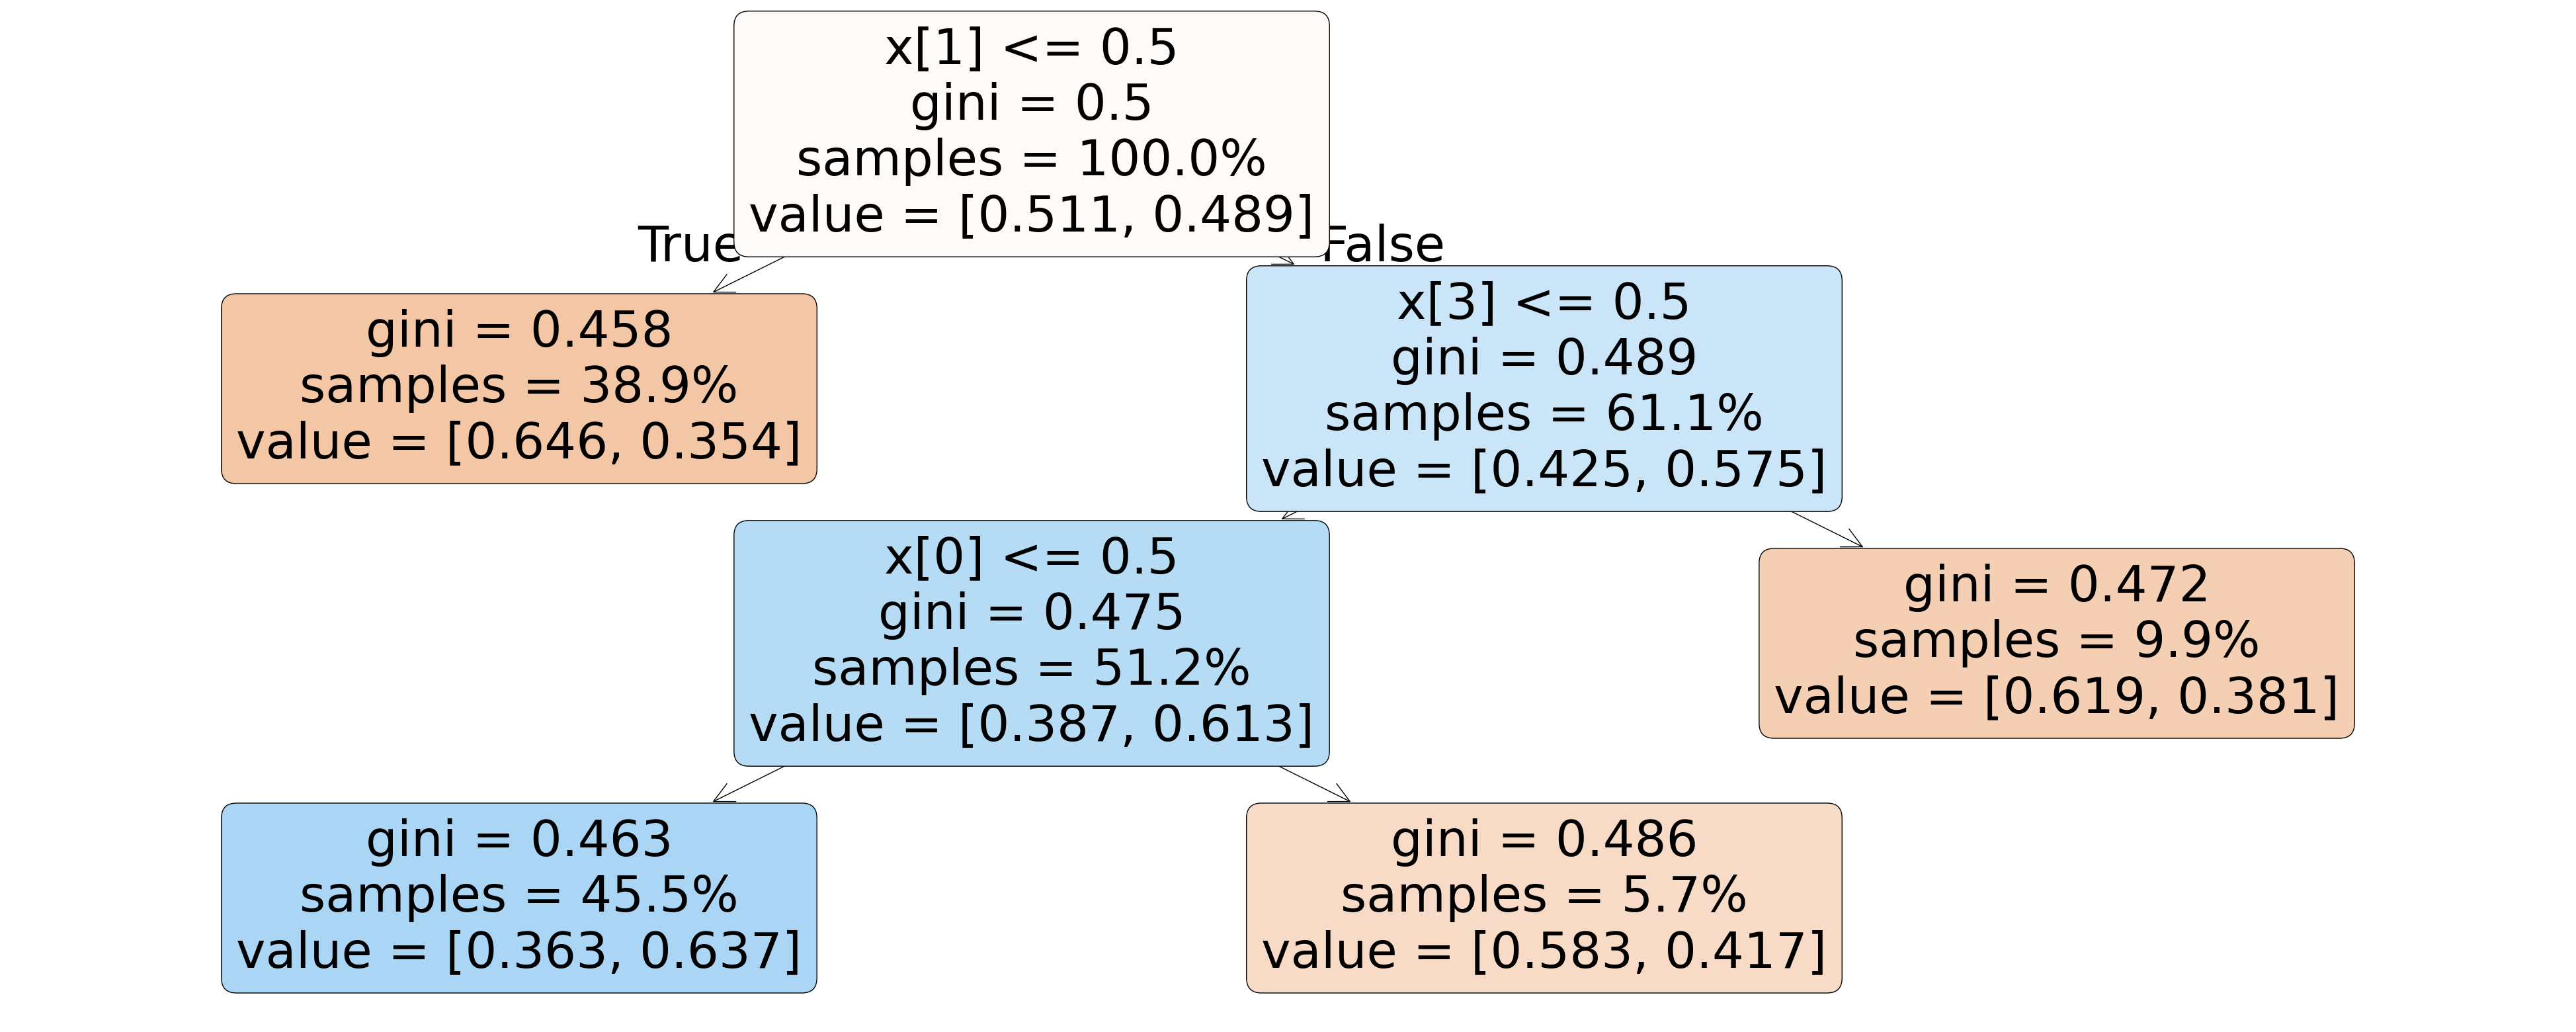

In [50]:
plt.figure(figsize=(50,20))
plot_tree(
    clf_podada,
    filled=True, 
    proportion = True,
    rounded = True)
plt.show()

- Métricas de Qualidade

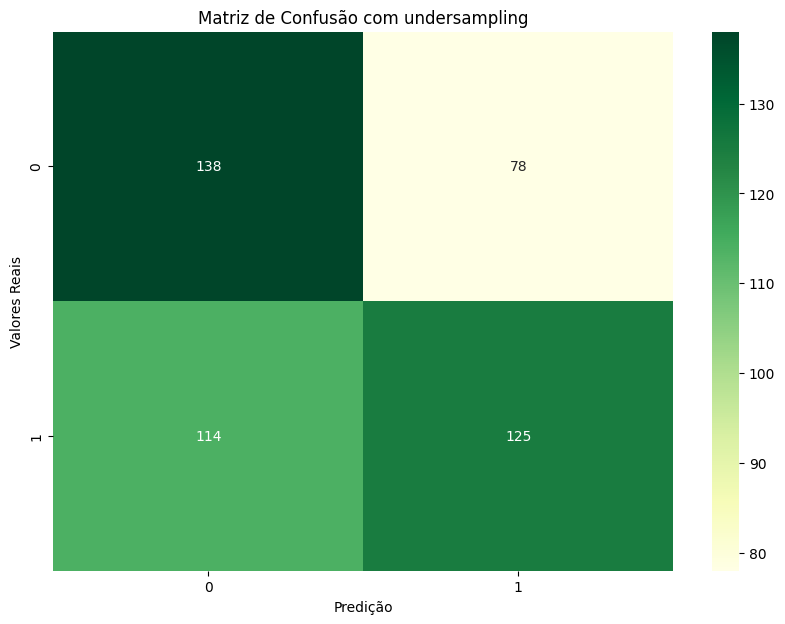

In [51]:
cm = confusion_matrix(y_test_s, clf_podada.predict(x_test_s))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGn')
plt.xlabel('Predição')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão com undersampling')
plt.show()

- Testando em 2024

In [73]:
df_2024 = pd.read_csv('data\proposicoes_2024.csv')
df_2024

,nomeProposicao,idProposicao,partidoAutor,DataApresentacao,Ano,Administração e Políticas Públicas,Desenvolvimento Social e Urbano,Direitos e Justiça,Economia e Desenvolvimento Sustentável,Infraestrutura e Gestão de Recursos,Influencia,Aliado,Oposição,PPC_igual_partidoAutor,VirouLei,Partido_Pres_Cam
0,PL 81/2024,2417025,PT,2024-02-05,2024,0,0,0,1,0,0.113060,1,0,0,1,PP
1,PL 147/2024,2417234,SOLIDARIEDADE,2024-02-06,2024,0,0,1,0,0,0.113060,1,0,0,1,PP
2,PL 545/2024,2419197,PT,2024-03-05,2024,1,0,0,1,0,0.027290,1,0,0,1,PP
3,PL 590/2024,2419509,REPUBLICANOS,2024-03-06,2024,0,0,1,0,0,0.132554,0,0,0,0,PP
4,PL 712/2024,2420454,PP,2024-03-12,2024,0,1,0,0,0,0.132554,1,0,1,0,PP
5,PL 1026/2024,2424079,PT,2024-03-27,2024,0,0,0,1,0,0.085770,1,0,0,1,PP
6,PL 1382/2024,2428628,PMDB,2024-04-23,2024,0,1,1,0,0,0.083821,1,0,0,0,PP
7,PL 1431/2024,2430014,REPUBLICANOS,2024-04-24,2024,0,0,1,1,0,0.113060,0,0,0,0,PP
8,PL 1564/2024,2431026,NOVO,2024-05-06,2024,0,1,1,1,0,0.132554,0,1,0,1,PP
9,PL 1630/2024,2431767,PDT,2024-05-07,2024,1,0,0,1,0,0.185185,1,0,0,0,PP


In [74]:
colunas = df_2024.columns.tolist()

x_2024 = df_2024[colunas[5:-2]]
y_2024 = df_2024[colunas[-2]]


In [75]:
acc_2024 = clf_podada.score(x_2024, y_2024)

print(f"Acurácia nos dados 2024: {acc_2024 * 100:.2f}%")

Acurácia nos dados 2024: 35.00%


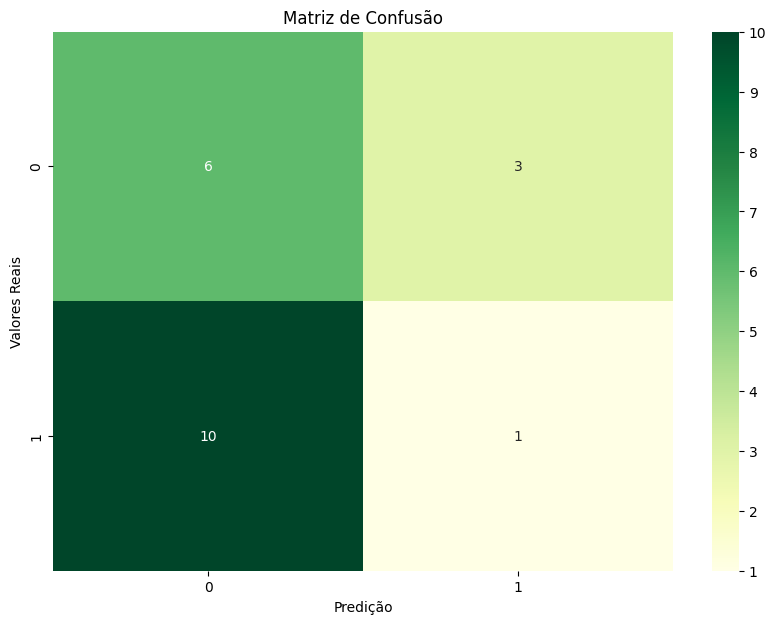

In [85]:
cm = confusion_matrix(y_2024, clf_podada.predict(x_2024))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGn')
plt.xlabel('Predição')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

- Comparando o data drift

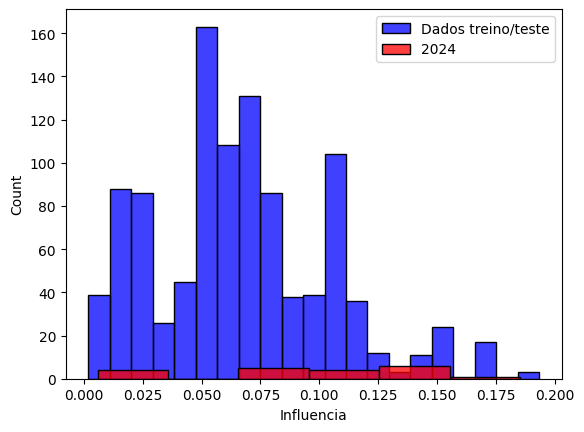

In [77]:
sns.histplot(x_train_s['Influencia'], color='blue', label='Dados treino/teste')
sns.histplot(x_2024['Influencia'], color='red', label='2024')
plt.legend()
plt.show()

Acurácia nos dados 2024: 38.89%


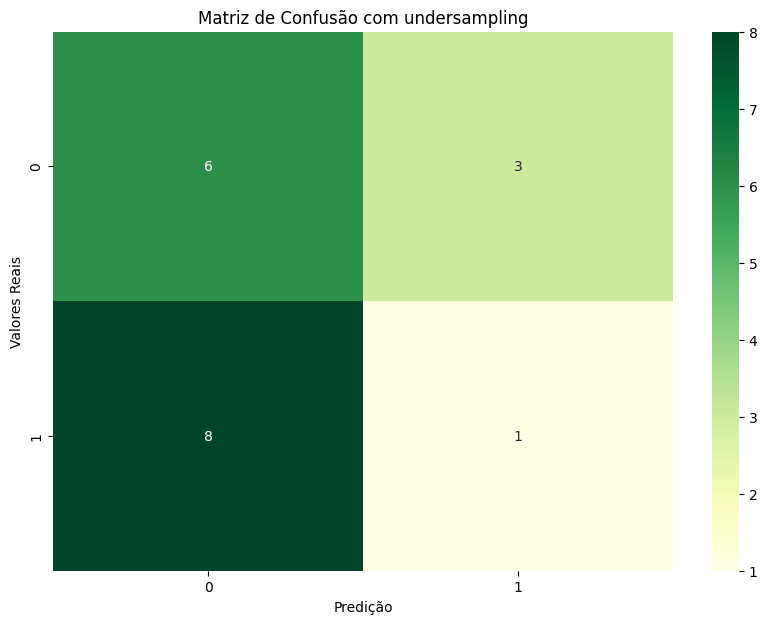

In [84]:
undersample = RandomUnderSampler(sampling_strategy=1.0)
x_sample, y_sample = undersample.fit_resample(x_2024, y_2024)

acc_sample = clf_podada.score(x_sample, y_sample)

print(f"Acurácia nos dados 2024: {acc_sample * 100:.2f}%")

cm = confusion_matrix(y_sample, clf_podada.predict(x_sample))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGn')
plt.xlabel('Predição')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão com undersampling')
plt.show()

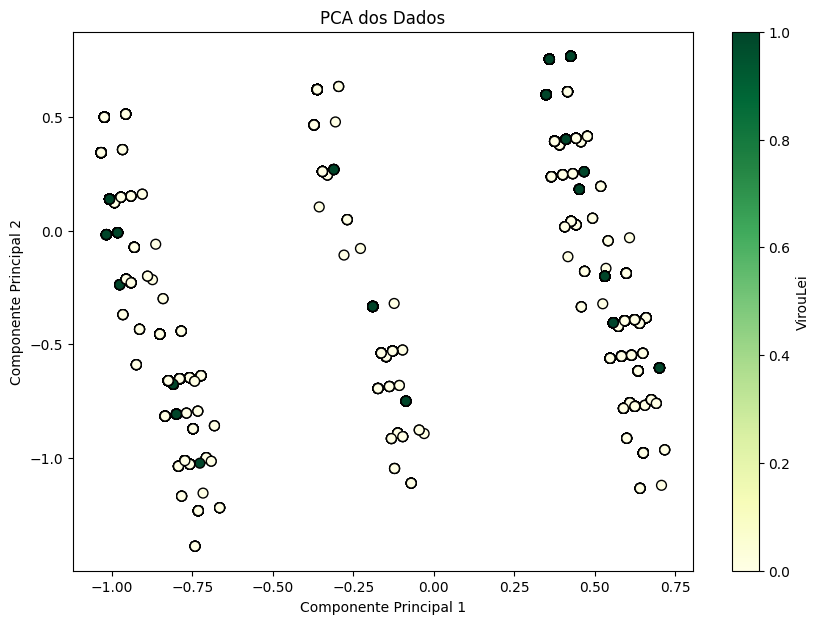

In [88]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

plt.figure(figsize=(10, 7))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap='YlGn', edgecolor='k', s=50)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA dos Dados')
plt.colorbar(label='VirouLei')
plt.show()

Conclusão: Árvores de decisão costumam se dar bem com dados categóricos, como é o nosso caso, mas aqui a separação entre as classes não foi satisfatória. Muito provavelmente porque os dados que estamos lidando não são linearmente separáveis.
Principalmente porque quando usando tecnicas para diminuir a complexidade da árvore e evitar overfitting, acabamos perdendo detalhes importantes sobre os padrões nos dados. As árvores de decisão fazem divisões retas (axiais), que não conseguem capturar a complexidade das interações que estão se sobrepondo.
No fim das contas, a árvore não teve um desempenho bom, mesmo com boa generalização.
Em suma, o modelo se mostrou simples demais para o problema em questão, resultando na baixa acuracia, apesar da boa generalização.


Mesmo que, ao longo do trabalho, tenha ficado evidente que a complexidade dos dados supera até mesmo os modelos mais robustos.


